In [14]:
from datetime import datetime
import glob, re
import lightgbm as lgb
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

import seaborn as sns

from scipy import optimize
from scipy import optimize
from scipy.sparse import vstack

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sqlalchemy import create_engine
import pyodbc as pyodbc
from xgboost.sklearn import XGBRegressor

pd.set_option('display.precision',3)

In [7]:

from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.feature_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
print(iris.target.shape)
print(iris.target_names)
iris.target

(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


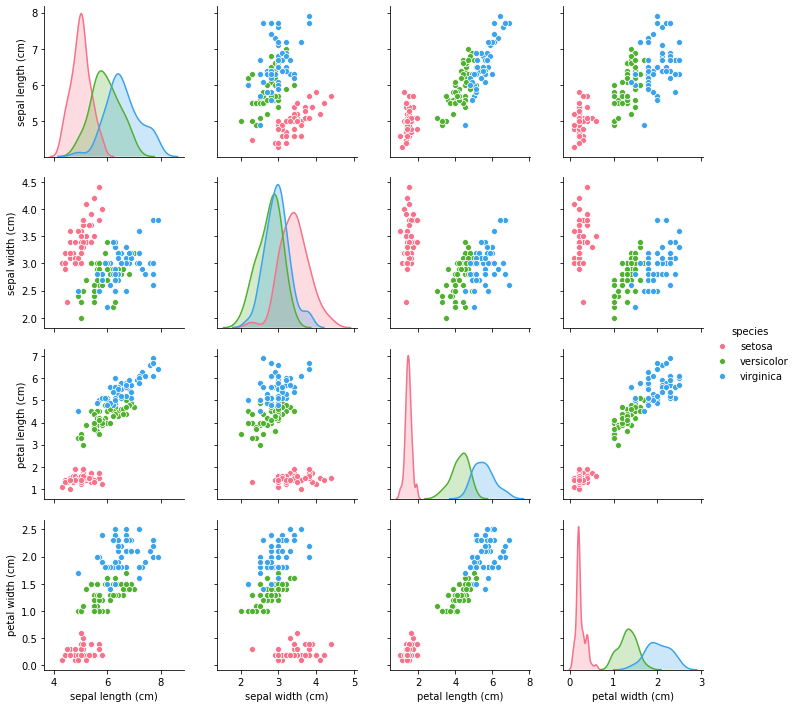

In [15]:
sns.pairplot( iris_data, hue='species', palette='husl' );

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:

print( model.intercept_ )

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [19]:
from sklearn.cluster import KMeans

model = KMeans( n_clusters=3 )
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
X = iris.data[:,0:2]
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
print( model.cluster_centers_, '\n')
print( model.labels_, '\n' )
print( model.inertia_, '\n')
print( iris.target )

[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]] 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2] 

37.05070212765958 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( iris['data'], 
                    iris['target'], 
                    test_size=0.2 )

print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )

The size of X_train is  (120, 4)
The size of y_train is  (120,)
The size of X_test is  (30, 4)
The size of y_test is  (30,)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

C:\Users\jingy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = model.predict( X_test )
p_pred = model.predict_proba( X_test )
print( y_test, '\n' )
print( y_pred, '\n' )
print( p_pred )

[1 0 1 0 0 0 0 1 2 2 2 1 2 0 0 0 1 0 0 2 1 1 1 1 0 2 2 2 2 2] 

[1 0 1 0 0 0 0 1 2 2 2 1 2 0 0 0 1 0 0 2 1 1 1 1 0 2 2 2 2 2] 

[[2.93740218e-02 9.48540079e-01 2.20858994e-02]
 [9.80653866e-01 1.93460589e-02 7.46222373e-08]
 [1.71786608e-02 9.11508059e-01 7.13132802e-02]
 [9.69934309e-01 3.00656038e-02 8.74027979e-08]
 [9.62608824e-01 3.73910684e-02 1.07362656e-07]
 [9.70132510e-01 2.98673410e-02 1.49232873e-07]
 [9.79030797e-01 2.09691317e-02 7.15877508e-08]
 [5.96102333e-03 8.21429869e-01 1.72609108e-01]
 [1.47075536e-03 4.14828999e-01 5.83700245e-01]
 [2.38888589e-04 1.90561465e-01 8.09199647e-01]
 [3.76019194e-04 3.00236245e-01 6.99387736e-01]
 [3.31821042e-02 9.50439974e-01 1.63779217e-02]
 [8.82057074e-04 4.33139937e-01 5.65978006e-01]
 [9.68617980e-01 3.13819451e-02 7.44835551e-08]
 [9.81564218e-01 1.84357372e-02 4.50497361e-08]
 [9.72539949e-01 2.74599892e-02 6.19421989e-08]
 [6.93468205e-03 8.08688997e-01 1.84376321e-01]
 [9.83393350e-01 1.66065777e-02 7.18600498e-08]
 [9.3892

In [31]:
s = ['Class 1 Prob', 'Class 2 Prob', 'Class 3 Prob']
prob_DF = pd.DataFrame( p_pred, columns=s )
prob_DF['Predicted Class'] = y_pred
prob_DF.head()

,Class 1 Prob,Class 2 Prob,Class 3 Prob,Predicted Class
0,0.029,0.949,2.209e-02,1
1,0.981,0.019,7.462e-08,0
2,0.017,0.912,7.131e-02,1
3,0.970,0.030,8.740e-08,0
4,0.963,0.037,1.074e-07,0


In [32]:
print( model.score( X_test, y_test ) )
print( np.sum(y_pred==y_test)/len(y_test) )

1.0
1.0


In [37]:
enc = ['win','draw','lose','win']
dec = ['draw','draw','win']
enc_DF = pd.DataFrame(enc)
dec_DF = pd.DataFrame(dec)

In [34]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

print( LE.fit(enc) )
print( LE.classes_ )
print( LE.transform(dec) )

LabelEncoder()
['draw' 'lose' 'win']
[0 0 2]


In [35]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

num = LE.fit_transform( enc )
print( num )
OHE_y = OHE.fit_transform( num.reshape(-1,1) )
OHE_y

[2 0 1 2]


C:\Users\jingy\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<4x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [36]:
OHE_y.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [38]:
# One-hot encoder method 2
OHE = OneHotEncoder()
OHE.fit_transform( enc_DF ).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [39]:
from sklearn.preprocessing import MinMaxScaler

X = np.array( [0, 0.5, 1, 1.5, 2, 100] )

X_scale = MinMaxScaler().fit_transform( X.reshape(-1,1) )
X_scale

array([[0.   ],
       [0.005],
       [0.01 ],
       [0.015],
       [0.02 ],
       [1.   ]])

In [40]:
from sklearn.preprocessing import StandardScaler

X_scale = StandardScaler().fit_transform( X.reshape(-1,1) )
X_scale

array([[-0.47424487],
       [-0.46069502],
       [-0.44714517],
       [-0.43359531],
       [-0.42004546],
       [ 2.23572584]])

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier( n_estimators=4, max_depth=5 )
RF.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
from sklearn import metrics
print ( "RF - Accuracy (Train):  %.4g" % 
        metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "RF - Accuracy (Test):  %.4g" % 
        metrics.accuracy_score(y_test, RF.predict(X_test)) )

RF - Accuracy (Train):  0.9917
RF - Accuracy (Test):  0.9667


In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
# transform 函数中，将输入的 DataFrame X 根据属性名称来获取其值。
class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [47]:
import pandas as pd

d = {'IQ':['high','avg','avg','low','high','avg','high','high',None],
    'temper':['good', None, 'good', 'bad', 'bad', 'bad', 'bad', None, 'bad'],
    'income':[50,40,30,5,7,10,9,np.nan,12],
    'height':[1.68,1.83,1.77,np.nan,1.9,1.65,1.88,np.NaN,1.75]}
X = pd.DataFrame(d)
X

,IQ,temper,income,height
0,high,good,50.0,1.68
1,avg,None,40.0,1.83
2,avg,good,30.0,1.77
3,low,bad,5.0,NaN
4,high,bad,7.0,1.90
5,avg,bad,10.0,1.65
6,high,bad,9.0,1.88
7,high,None,NaN,NaN
8,None,bad,12.0,1.75


In [49]:
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

categorical_features = ['IQ', 'temper']
numeric_features = ['income', 'height']

categorical_pipe = Pipeline([
    ('select', DataFrameSelector(categorical_features)),
    ('impute', SimpleImputer(missing_values=None, strategy='most_frequent')),
    ('one_hot_encode', OneHotEncoder(sparse=False))
])

numeric_pipe = Pipeline([
    ('select', DataFrameSelector(numeric_features)),
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('normalize', MinMaxScaler())
])

full_pipe = FeatureUnion(transformer_list=[
    ('numeric_pipe', numeric_pipe),
    ('categorical_pipe', categorical_pipe)
])

In [50]:
X_proc = full_pipe.fit_transform( X )
print( X_proc )

[[1.         0.12       0.         1.         0.         0.
  1.        ]
 [0.77777778 0.72       1.         0.         0.         1.
  0.        ]
 [0.55555556 0.48       1.         0.         0.         0.
  1.        ]
 [0.         0.52       0.         0.         1.         1.
  0.        ]
 [0.04444444 1.         0.         1.         0.         1.
  0.        ]
 [0.11111111 0.         1.         0.         0.         1.
  0.        ]
 [0.08888889 0.92       0.         1.         0.         1.
  0.        ]
 [0.34166667 0.52       0.         1.         0.         1.
  0.        ]
 [0.15555556 0.4        0.         1.         0.         1.
  0.        ]]
